In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

In [10]:
#Read cleaned data csv and display data fram
listing_data = Path('clean_states.csv') 
all_listings_df = pd.read_csv(listing_data)
all_listings_df = all_listings_df[['price','bed','bath','acre_lot','house_size','state','city']]
all_listings_df.head()

,price,bed,bath,acre_lot,house_size,state,city
0,579900.0,4.0,3.0,2.34,3320.0,Connecticut,Coventry
1,215000.0,2.0,1.0,0.91,960.0,Connecticut,East Windsor
2,144900.0,2.0,1.0,0.36,860.0,Connecticut,Vernon
3,174900.0,3.0,2.0,0.19,1280.0,Connecticut,Manchester
4,289900.0,4.0,2.0,0.38,1617.0,Connecticut,East Windsor


In [20]:
#Function that will plot linear regression for differnt housing variables
def house_plot(x_axis, y_axis):

    # Plots a scatter plot
    plt.scatter(x=x_axis, y=y_axis, color='blue')

    # Calculates the correlation or r-value between the two variables
    corr = round(st.pearsonr(x_axis, y_axis)[0],2)

    # Calculates the linear regression
    (slope, intercept, rvalue, pvalue, tderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept

    # writes the linear regresion equation to by displayed on graph
    lin_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
    
    # Plots linear Regression line and annotates graph
    plt.plot(x_axis,regress_values, color='red')
    plt.tight_layout()
    plt.annotate(lin_eq,((x_axis.max() - .5),100000))
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

The r-squared is: 0.05915823289521343


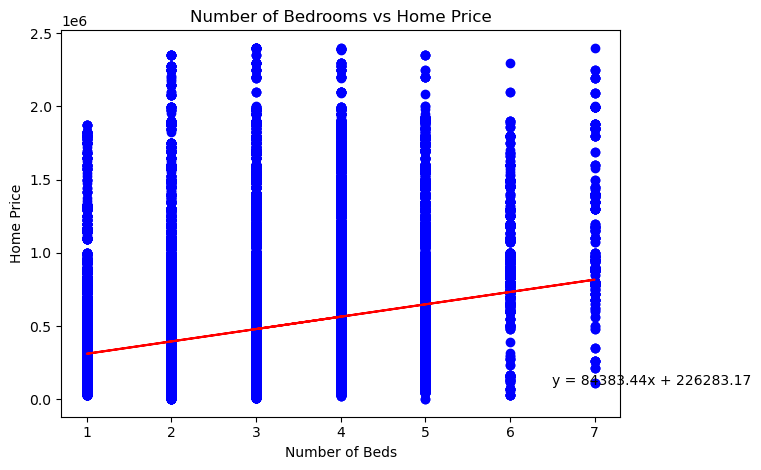

In [22]:
#plot out number of bedrooms vs. house price and calculate regression
plt.xlabel('Number of Beds')
plt.ylabel('Home Price')
plt.title('Number of Bedrooms vs Home Price')
house_plot(all_listings_df['bed'],all_listings_df['price'])

The r-squared is: 0.2068247597033287


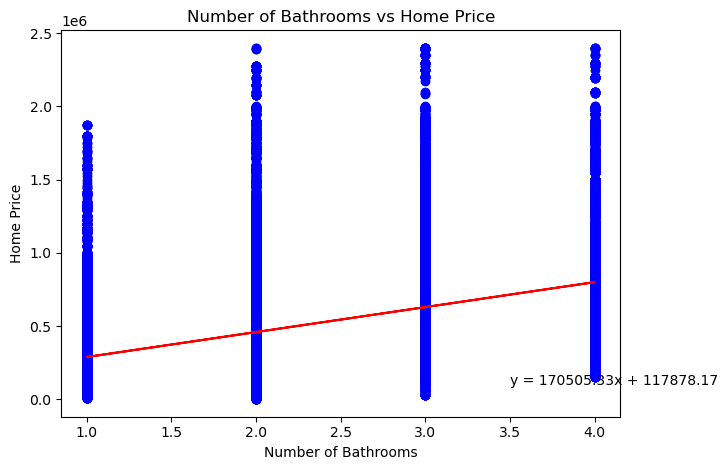

In [23]:
#plot out number of bathrooms vs. house price and calculate regression
plt.xlabel('Number of Bathrooms')
plt.ylabel('Home Price')
plt.title('Number of Bathrooms vs Home Price')
house_plot(all_listings_df['bath'],all_listings_df['price'])

The r-squared is: 2.4596470858685934e-05


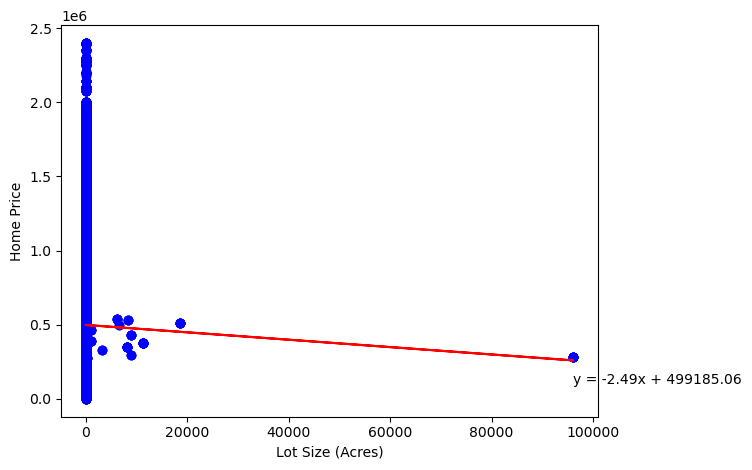

In [27]:
#plot out lot size (acres) vs. house price and calculate regression
plt.xlabel('Lot Size (Acres)')
plt.ylabel('Home Price')
plt.title('Lot Size (Acres) vs Home Price')
house_plot(all_listings_df['acre_lot'],all_listings_df['price'])

The r-squared is: 0.2397026769038599


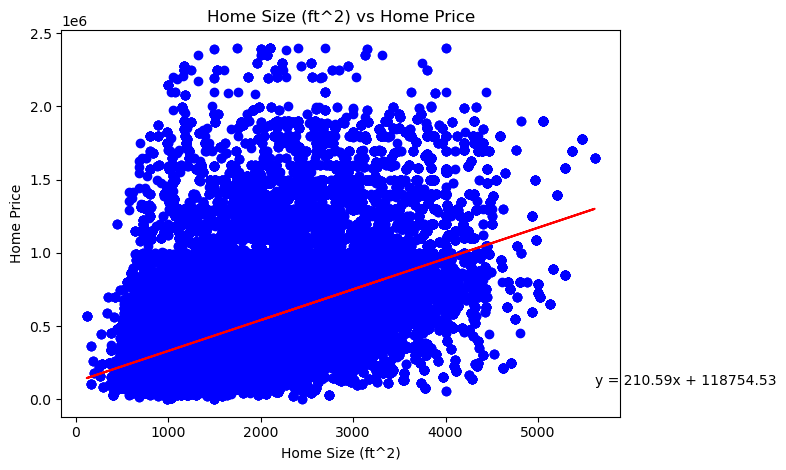

In [28]:
#plot out lot size (acres) vs. house price and calculate regression
plt.xlabel('Home Size (ft^2)')
plt.ylabel('Home Price')
plt.title('Home Size (ft^2) vs Home Price')
house_plot(all_listings_df['house_size'],all_listings_df['price'])

In [37]:
#create data frames filtered for each state (Connecticut, Massachusetts, New Jersey, New York)
ct_df = all_listings_df[all_listings_df['state']=='Connecticut']
ma_df = all_listings_df[all_listings_df['state']=='Massachusetts']
nj_df = all_listings_df[all_listings_df['state']=='New Jersey']
ny_df = all_listings_df[all_listings_df['state']=='New York']

**Connecticut Specific Analysis**

The r-squared is: 0.0878572077873857


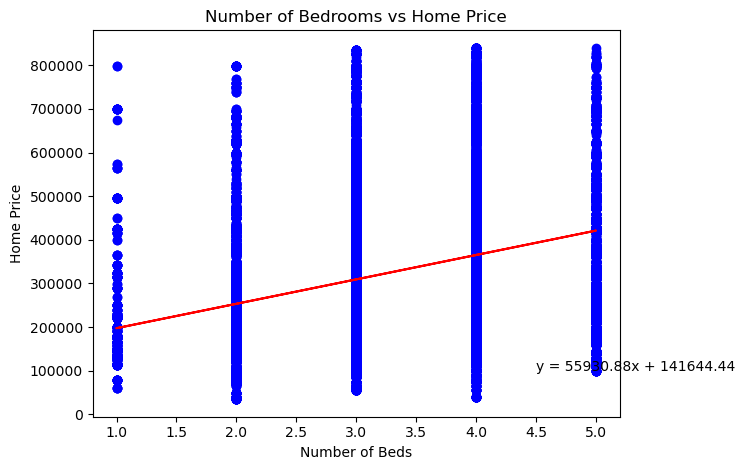

In [42]:
#plot out number of bedrooms vs. house price and calculate regression
plt.xlabel('Number of Beds')
plt.ylabel('Home Price')
plt.title('Number of Bedrooms vs Home Price')
house_plot(ct_df['bed'],ct_df['price'])

The r-squared is: 0.3761353491501531


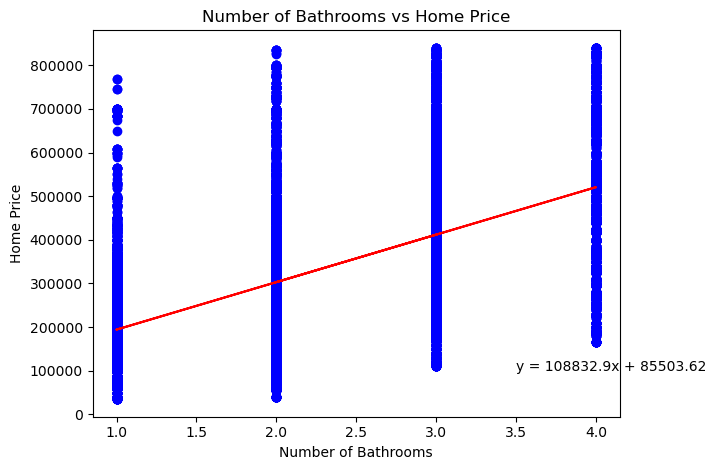

In [43]:
#plot out number of bathrooms vs. house price and calculate regression
plt.xlabel('Number of Bathrooms')
plt.ylabel('Home Price')
plt.title('Number of Bathrooms vs Home Price')
house_plot(ct_df['bath'],ct_df['price'])

The r-squared is: 0.18076440149419387


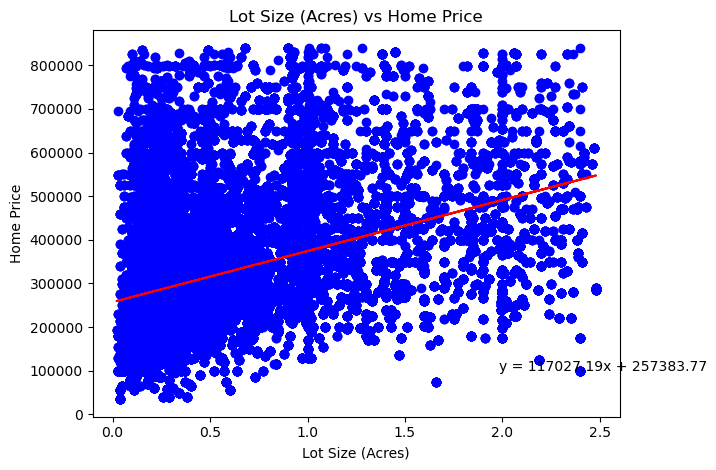

In [44]:
plt.xlabel('Lot Size (Acres)')
plt.ylabel('Home Price')
plt.title('Lot Size (Acres) vs Home Price')
house_plot(ct_df['acre_lot'],ct_df['price'])

The r-squared is: 0.41202141411942117


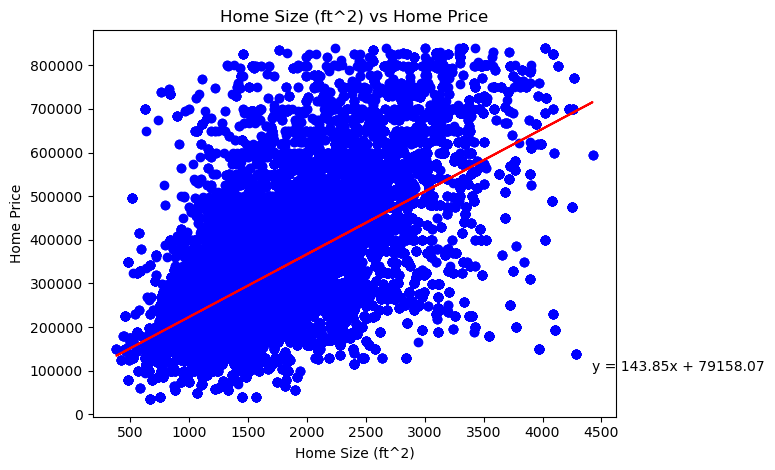

In [45]:
plt.xlabel('Home Size (ft^2)')
plt.ylabel('Home Price')
plt.title('Home Size (ft^2) vs Home Price')
house_plot(ct_df['house_size'],ct_df['price'])